In [70]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [71]:
 weight = 0.7
 bias = 0.3

In [72]:
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [73]:
train_split = int(0.8 * len(X))

x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

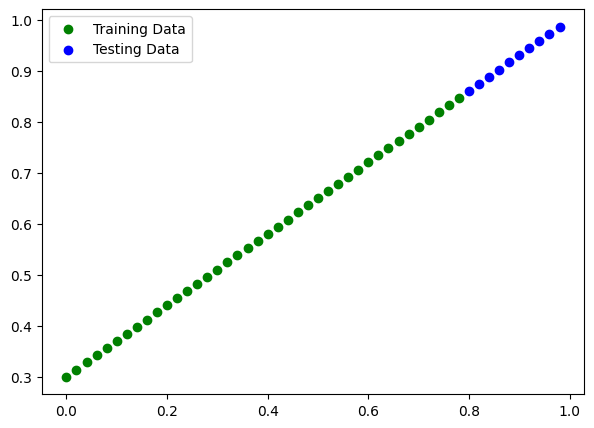

In [74]:
plt.figure(figsize=(7,5))
plt.scatter(x_train, y_train, c='g', label="Training Data")
plt.scatter(x_test, y_test, c='b', label="Testing Data")
plt.legend()
plt.show()

#Creating Our Model

In [75]:
class Linear_Regression_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [76]:
torch.manual_seed(42)

model_0 = Linear_Regression_Model()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [77]:
with torch.inference_mode(): # Turns off Gradiend Tracking
  y_pred = model_0(x_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

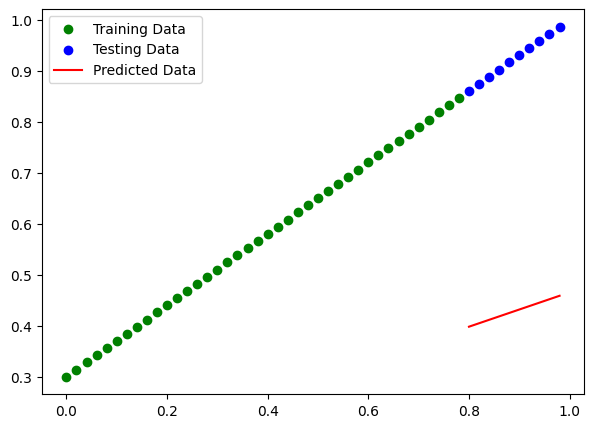

In [78]:
plt.figure(figsize=(7,5))
plt.scatter(x_train, y_train, c='g', label="Training Data")
plt.scatter(x_test, y_test, c='b', label="Testing Data")
plt.plot(x_test, y_pred, c='r', label="Predicted Data")
plt.legend()
plt.show()

In [79]:
# Showing the parameters of our model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [80]:
# Another way to show your parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [81]:
# Setting a Loss Function
Loss_Function = nn.L1Loss()

# Setting an optimizer
Optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

In [82]:
epochs = 2000

for epoch in range(epochs):
  # Setting the model on training mode
  model_0.train() #train mode sets all parameters that require grad to require grad

  # 1. Forward Pass
  y_pred = model_0(x_train)

  # 2. Loss Function
  loss = Loss_Function(y_pred, y_train)

  # 3. Optimizer
  Optimizer.zero_grad() # Here we zero the model previous gradience to avoid default accumlation at step 5

  # 4. back_propagation
  loss.backward()

  # 5. Step the optimizer
  Optimizer.step()

  # printing the loss
  if epoch % 100 == 0:
    print(f"loss: {loss}")
    print(model_0.state_dict())

loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
loss: 0.19767141342163086
OrderedDict([('weights', tensor([0.3761])), ('bias', tensor([0.2298]))])
loss: 0.08973254263401031
OrderedDict([('weights', tensor([0.4150])), ('bias', tensor([0.3257]))])
loss: 0.05357731133699417
OrderedDict([('weights', tensor([0.4485])), ('bias', tensor([0.3730]))])
loss: 0.04549176245927811
OrderedDict([('weights', tensor([0.4730])), ('bias', tensor([0.3855]))])
loss: 0.04160415381193161
OrderedDict([('weights', tensor([0.4924])), ('bias', tensor([0.3839]))])
loss: 0.03811401128768921
OrderedDict([('weights', tensor([0.5104])), ('bias', tensor([0.3789]))])
loss: 0.03466346859931946
OrderedDict([('weights', tensor([0.5277])), ('bias', tensor([0.3724]))])
loss: 0.03122851625084877
OrderedDict([('weights', tensor([0.5448])), ('bias', tensor([0.3652]))])
loss: 0.027794325724244118
OrderedDict([('weights', tensor([0.5619])), ('bias', tensor([0.3580]))])
loss: 0.0

In [83]:
# Testing
model_0.eval() # turns off gradience tracking set in step 1 and other settings not needed for testing
y_test_pred = model_0(x_test)
test_loss = Loss_Function(y_test_pred, y_test)


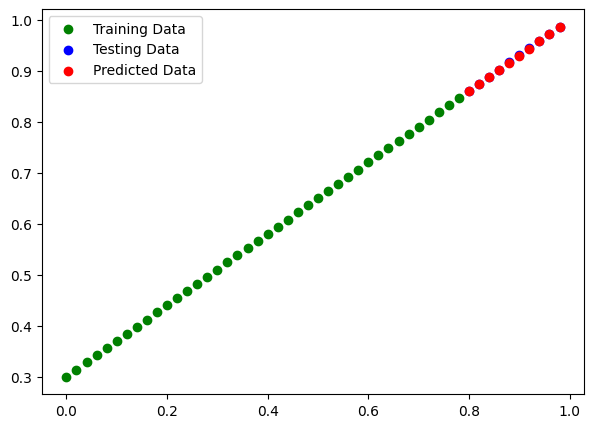

In [84]:
plt.figure(figsize=(7,5))
plt.scatter(x_train, y_train, c='g', label="Training Data")
plt.scatter(x_test, y_test, c='b', label="Testing Data")
plt.scatter(x_test, y_test_pred.detach().numpy(), c='r', label="Predicted Data")
plt.legend() # Adds a box with colors for each scatter
plt.show()

In [85]:
# Saving our pytorch model
from pathlib import Path

# 1. Creating a directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_Linear_Regression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Saving the model
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [86]:
# Load the model
# 1. Instantiate a new instance of our model
loaded_model = Linear_Regression_Model()

# 2. Load the state_dict
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [87]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [88]:
# Testing the loaded model
loaded_model.eval()
with torch.inference_mode():
  y_pred_loaded = loaded_model(x_test)

  # Calculate the loss
  loss_loaded = Loss_Function(y_pred_loaded, y_test)

  print(loss_loaded)

tensor(0.0008)
